## Exploring the Titanic dataset

In [7]:
import pandas as pd

titanic = pd.read_csv('titanic2.csv')

In [8]:
# Remove ' from column names
titanic.columns = [column.replace("'", "") for column in titanic.columns]

Check the dataframes head

In [9]:
titanic.head()

,id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,1,"Allen,Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis,MO"
1,2,1,1,"Allison,Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal,PQ / Chesterville,ON"
2,3,1,0,"Allison,Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal,PQ / Chesterville,ON"
3,4,1,0,"Allison,Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal,PQ / Chesterville,ON"
4,5,1,0,"Allison,Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal,PQ / Chesterville,ON"


Get the shape (rows, columns)

In [10]:
titanic.shape

(1309, 15)

Check data types

In [18]:
titanic.dtypes

id             int64
pclass         int64
survived       int64
name          object
sex           object
age           object
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body          object
home.dest     object
dtype: object

Remove ? from the data

In [16]:
import numpy as np
# Remove all ?
titanic = titanic.replace('?', np.nan)

Convert fare to float

In [17]:
titanic.fare = titanic.fare.astype(float)

Check out pclass

In [12]:
titanic.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

Check for missing values

In [19]:
titanic.isnull().sum()

id              0
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Describe the data set

In [20]:
titanic.describe()

,id,pclass,survived,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,0.381971,0.498854,0.385027,33.295479
std,378.020061,0.837836,0.486055,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,0.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,0.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,1.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,1.000000,8.000000,9.000000,512.329200


Fare looks strange. Let us explore it

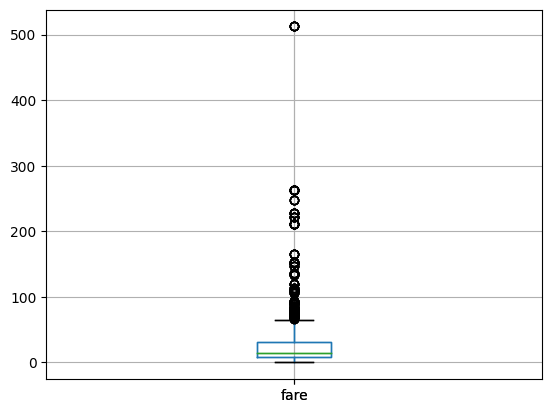

In [22]:
import matplotlib.pyplot as plt

titanic.boxplot(column='fare')
plt.show()

In [23]:
titanic[titanic.fare > 500]

,id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,50,1,1,"Cardeza,Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown,Philadelphia,PA"
50,51,1,1,"Cardeza,Mrs. James Warburton Martinez (Charlot...",female,58,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown,Philadelphia,PA"
183,184,1,1,"Lesurer,Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,303,1,1,"Ward,Miss. Anna",female,35,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN


How many survived?

In [24]:
titanic.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

In [25]:
titanic.groupby(['sex'])['survived'].mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

In [26]:
titanic.groupby(['sex', 'pclass'])['survived'].mean()

sex     pclass
female  1         0.965278
        2         0.886792
        3         0.490741
male    1         0.340782
        2         0.146199
        3         0.152130
Name: survived, dtype: float64

In [29]:
titanic.age = titanic.age.astype(float)

In [30]:
titanic[titanic.age < 18].groupby(['sex', 'pclass'])['survived'].mean()

sex     pclass
female  1         0.875000
        2         1.000000
        3         0.543478
male    1         0.857143
        2         0.733333
        3         0.233333
Name: survived, dtype: float64

Check correleation

In [31]:
titanic.corr()

C:\Users\joaki\AppData\Local\Temp\ipykernel_38776\2964377706.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr()


,id,pclass,survived,age,sibsp,parch,fare
id,1.000000,0.897822,-0.293717,-0.343888,0.065594,0.003584,-0.481215
pclass,0.897822,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629
survived,-0.293717,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265
age,-0.343888,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739
sibsp,0.065594,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238
parch,0.003584,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539
fare,-0.481215,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000
